In [1]:
using Pkg
Pkg.activate("pidc")

  Activating project at `/data/gpfs/projects/punim0638/stephenz/locaTE-paper/examples/cellcycle_metabolic/pidc`


In [2]:
using NetworkInference

[ Info: Precompiling NetworkInference [6b44d3db-2bc5-5ac3-b70f-26aa69b1b11b]
┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /cache/build/default-aws-shared0-3/julialang/julia-release-1-dot-8/usr/share/julia/stdlib/v1.8/Pkg/src/Pkg.jl:675


In [3]:
n = infer_network("expr.csv", PIDCNetworkInference(); delim = ',');
w = [e.weight for e in n.edges]
e = [(e.nodes[1].label, e.nodes[2].label) for e in n.edges];

Getting nodes...
Inferring network...


In [4]:
genes = [x.label for x in n.nodes];

In [5]:
N_g = length(n.nodes)
A = zeros(N_g, N_g)
for (w_, e_) in zip(w, e)
    A[findfirst(x -> x == e_[1], genes)[1], 
      findfirst(x -> x == e_[2], genes)[1]] = w_
end

In [6]:
A = A + A';

In [7]:
using NPZ
npzwrite("A_pidc.npy", A);

[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
┌ Warning: backend `GR` is not installed.
└ @ Plots ~/.julia/packages/Plots/rz1WP/src/backends.jl:43


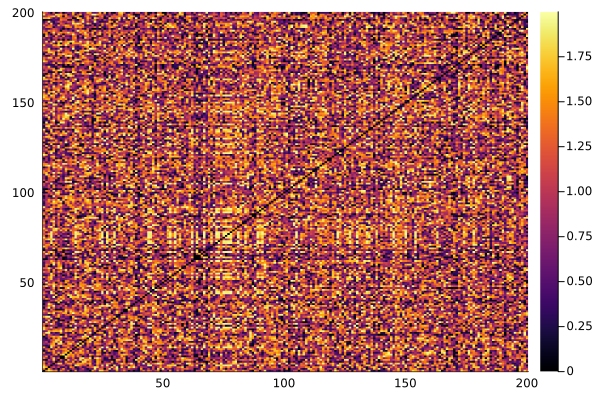

In [8]:
using Plots
heatmap(A)